In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Load the datasets

* 3 different datasets will be loaded in to dataframes
* Dataset can be downloaded in https://www.kaggle.com/nitishabharathi/email-spam-dataset

In [2]:
dataset1 = pd.read_csv('datasets/completeSpamAssassin.csv')
dataset2 = pd.read_csv('datasets/enronSpamSubset.csv')
dataset3 = pd.read_csv('datasets/lingSpam.csv')

In [3]:
print('Dataset 1 shape:',dataset1.shape)
print('Dataset 2 shape:',dataset2.shape)
print('Dataset 3 shape:',dataset3.shape)

Dataset 1 shape: (6046, 3)
Dataset 2 shape: (10000, 4)
Dataset 3 shape: (2605, 3)


In [4]:
dataset1.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [5]:
dataset2.head()

,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [6]:
dataset3.head()

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


### Sample email

In [7]:
dataset1.iloc[0]['Body']

"\nSave up to 70% on Life Insurance.\nWhy Spend More Than You Have To?Life Quote Savings\nEnsuring your \n      family's financial security is very important. Life Quote Savings makes \n      buying life insurance simple and affordable. We Provide FREE Access to The \n      Very Best Companies and The Lowest Rates.Life Quote Savings is FAST, EASY and \n            SAVES you money! Let us help you get started with the best values in \n            the country on new coverage. You can SAVE hundreds or even thousands \n            of dollars by requesting a FREE quote from Lifequote Savings. Our \n            service will take you less than 5 minutes to complete. Shop and \n            compare. SAVE up to 70% on all types of Life insurance! Click Here For Your \n            Free Quote!Protecting your family is the best investment you'll ever \n          make!\nIf you are in receipt of this email \n      in error and/or wish to be removed from our list, PLEASE CLICK HERE AND TYPE REMOVE. If

# Data Preparation

* Drop unnecessary columns
* Concatenate the three datasets
* Check for null values

### Drop unnecessary columns

In [8]:
dataset1_1 = dataset1[['Body','Label']]
dataset2_1 = dataset2[['Body','Label']]
dataset3_1 = dataset3[['Body','Label']]

In [9]:
dataset1_1.head(3)

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1


In [10]:
dataset2_1.head(3)

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1


In [11]:
dataset3_1.head(3)

,Body,Label
0,Subject: great part-time or summer job !\n \n ...,1
1,Subject: auto insurance rates too high ?\n \n ...,1
2,Subject: do want the best and economical hunti...,1


### Concatenate the three datasets

In [12]:
df = pd.concat([dataset1_1,dataset2_1,dataset3_1],ignore_index=True).rename(columns={'Body':'Email','Label':'Spam'})

In [13]:
df.shape

(18651, 2)

### Check for null values

In [14]:
df.isnull().sum()

Email    1
Spam     0
dtype: int64

In [15]:
# drop the null email

df.dropna(inplace=True)
df.shape

(18650, 2)

In [16]:
df.head()

,Email,Spam
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


# Feature Engineering

* New feature for email length
* New feature for number of special characters in email
* New feature for number of digits in email
* New feature for number of spam trigger words present in email

In [17]:
df2 = df

### New feature for email length

In [18]:
email_length = []

for email in df2['Email']:
    email_length.append(len(email))
    
df2['Email length'] = email_length

### New feature for number of special characters in email

In [19]:
special_characters = []

for email in df2['Email']:
    special_characters_counter = 0
    for char in email:
        if not char.isalnum():
            special_characters_counter+=1
    special_characters.append(special_characters_counter)
        
df2['Special characters'] = special_characters

### New feature for digit count in email

In [20]:
digits = []

for email in df2['Email']:
    digits_counter = 0
    for char in email:
        if char.isdigit():
            digits_counter+=1
    digits.append(digits_counter)
            
            
df2['Digits'] = digits

### New feature for number of spam trigger words present in email

In [21]:
spam_trigger_words = ['buy','click','get','free','order','save','limited']

trigger_words = []

for email in df2['Email']:
    trigger_words_counter = 0
    email = email.split()
    for word in email:
        if word.lower() in spam_trigger_words:
            trigger_words_counter+=1
    trigger_words.append(trigger_words_counter)
    
df2['Trigger words'] = trigger_words

In [22]:
df2.head()

,Email,Spam,Email length,Special characters,Digits,Trigger words
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,331,5,9
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,176,51,2
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,143,51,2
3,##############################################...,1,2863,1004,106,8
4,I thought you might like these:\n1) Slim Down ...,1,641,144,34,2


# Exploratory Data Analysis

* Email distribution
* Email length of spam and not spam emails
* Special characters in emails
* Digit count in spam and not spam emails
* Spam trigger words present in spam and not spam emails

### Email distribution

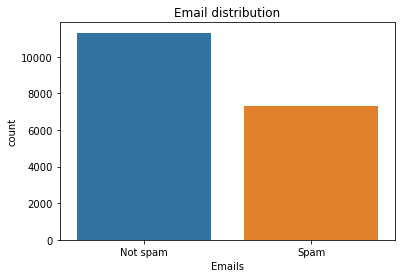

In [23]:
sns.countplot(x='Spam',data=df2)
plt.title('Email distribution')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

* We can see that the distribution is not imbalanced

### Email length of spam and not spam emails

In [24]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

df2['Email length'].describe()

count      18650
mean        2776
std       125173
min            1
25%          417
50%          896
75%         1905
max     17085626
Name: Email length, dtype: float64

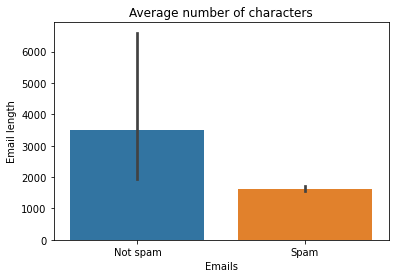

In [25]:
# Average number of characters

sns.barplot(x='Spam',y='Email length',data=df2)
plt.title('Average number of characters')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

We can see that there are emails which are too long specially on not spam emails.

### Special characters in emails

In [26]:
df2['Special characters'].describe()

count     18650
mean        751
std       35010
min           0
25%         107
50%         242
75%         515
max     4779145
Name: Special characters, dtype: float64

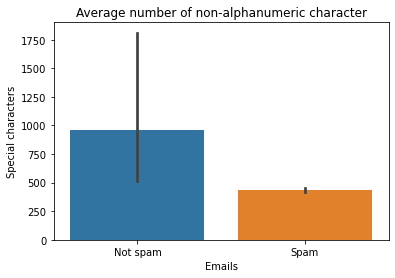

In [27]:
# Average number of Non-alphanumeric character

sns.barplot(x='Spam',y='Special characters',data=df2)
plt.title('Average number of non-alphanumeric character')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

### Digit count of spam and not spam emails

In [28]:
df2['Digits'].describe()

count    18650
mean        62
std       2714
min          0
25%          4
50%         17
75%         41
max     369911
Name: Digits, dtype: float64

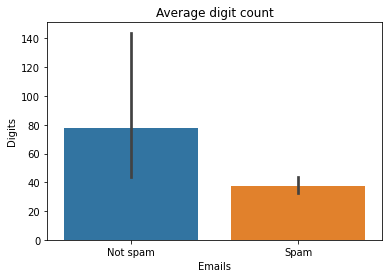

In [29]:
# Average digit count

sns.barplot(x='Spam',y='Digits',data=df2)
plt.title('Average digit count')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

We can see that there are huge amount of non-alphanumeric characters and digits present in emails.

### Spam trigger words present in spam and not spam emails

In [30]:
df2['Trigger words'].describe()

count   18650
mean        2
std        68
min         0
25%         0
50%         0
75%         1
max      9254
Name: Trigger words, dtype: float64

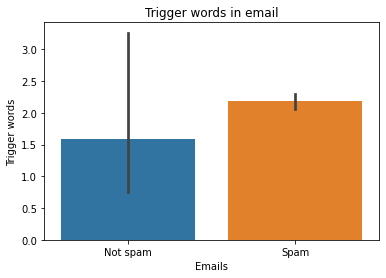

In [31]:
# Trigger words in emails

sns.barplot(x='Spam',y='Trigger words',data=df2)
plt.title('Trigger words in email')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

We can see that spam trigger words are definitely present in spam emails.

# Data Preprocessing

* Remove subject, tabs and new lines
* Remove special characters and digits
* Convert emails into lower case
* Tokenize the emails by words / split by words
* Remove stopwords
* Lemmetize words
* Build corpus of emails
* Remove too short and long emails
* Create vectors using TF-IDF

In [32]:
# Importing essential libraries for data preprocessing and nlp
import re
import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [33]:
# i will be dropping emails with length over 2000 and below 15

df3 = df2[(df2['Email length']<2000) & (df2['Email length']>15)]
df3.shape

(13650, 6)

In [34]:
# Data Cleaning
corpus = []
lemmatizer = WordNetLemmatizer()

for email in df3['Email']:
    # Remove subject, tabs and new lines
    removed_tabs_newline = re.sub('[\n|\t]',' ',email)
    removed_subject = re.sub('Subject:',' ',removed_tabs_newline)
    
    # Remove special characters and digits
    removed_spchar_digits = re.sub('[^a-zA-Z]',' ',removed_subject)
    
    # Convert emails into lower case
    lower_case_email = removed_spchar_digits.lower()
    
    # Tokenize the emails by words / split by words
    tokenized_email = lower_case_email.split()
    
    # Remove stopwords
    filtered_words = [word for word in tokenized_email if word not in stopwords.words('english')]
    
    # Lemmetize words
    lemmetized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    # Build corpus of emails
    email = ' '.join(lemmetized_words)
    corpus.append(email)
     

In [35]:
# Creating vectors using TF-IDF

tfidf = TfidfVectorizer(max_features=5000)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df3['Spam']

# Model Building

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [38]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
print('Model score on test data:',classifier.score(X_test,y_test))

Model score on test data: 0.9684981684981685


In [39]:
cross_val_score(classifier,X_test,y_test)

array([0.96214896, 0.96092796, 0.95848596, 0.95360195, 0.96581197])

### Confusion matrix and Classification Report

In [40]:
y_predicted = classifier.predict(X_test)

In [41]:
confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

array([[2418,   38],
       [  91, 1548]], dtype=int64)

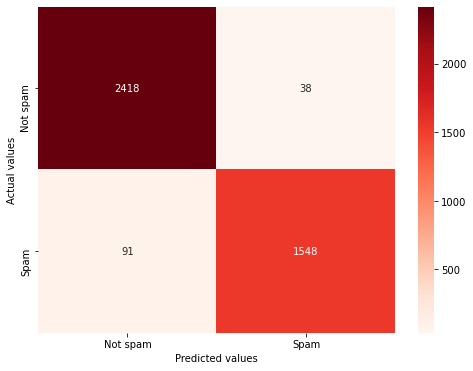

In [42]:
labels = ['Not spam','Spam']
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [43]:
classification_report_result = classification_report(y_test,y_predicted)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2456
           1       0.98      0.94      0.96      1639

    accuracy                           0.97      4095
   macro avg       0.97      0.96      0.97      4095
weighted avg       0.97      0.97      0.97      4095



### Saving the model and vectorizer

In [44]:
import pickle

In [45]:
pickle.dump(classifier,open('spam_email_classifier.pickle','wb'))
pickle.dump(tfidf,open('vectorizer.pickle','wb'))

### Making predictions

* 0 - Not spam email
* 1 - Spam email


In [46]:
# load pickle files

loaded_classifier = pickle.load(open('spam_email_classifier.pickle','rb'))
loaded_vectorizer = pickle.load(open('vectorizer.pickle','rb'))

In [47]:
def classify_email(email):
    lemmatizer = WordNetLemmatizer()
    removed_tabs_newline = re.sub('[\n|\t]',' ',email)
    removed_subject = re.sub('Subject:',' ',removed_tabs_newline)
    removed_spchar_digits = re.sub('[^a-zA-Z]',' ',removed_subject)
    lower_case_email = removed_spchar_digits.lower()
    tokenized_email = lower_case_email.split()
    filtered_words = [word for word in tokenized_email if word not in stopwords.words('english')]
    lemmetized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    email = ' '.join(lemmetized_words)
    
    vector = loaded_vectorizer.transform([email]).toarray()
    return loaded_classifier.predict(vector)

In [48]:
not_spam_email1 = 'Let me begin by thanking you for your past contributions\
to our Little League baseball team. Your sponsorship aided in the purchase of\
ten full uniforms and several pieces of baseball equipment for last year\'s season.'

In [49]:
classify_email(not_spam_email1)

array([0], dtype=int64)

In [50]:
not_spam_email2 = 'Next month, our company is planning an employee appreciation\
pancake breakfast honoring retired employees for their past years of service and\
present employees for their loyalty and dedication in spite of the current difficult economic conditions.'

In [51]:
classify_email(not_spam_email2)

array([0], dtype=int64)

In [52]:
not_spam_email3 = 'It\'s great to hear all your news! I was staying in my grandmother\'s house for a \
while, and couldn\'t respond to you immediately. Answering your question: I used to love Saturdays. \
Since we are doing online school, I prefer Fridays now because I only have two classes, which is math\
and history (the most interesting subject). You know I am not a huge fan of calculus, but my teacher \
is so nice and humorous that we all enjoy her lectures.'

In [53]:
classify_email(not_spam_email3)

array([0], dtype=int64)

In [54]:
spam_email1 = 'Get on the hype train - 90% OFF with a Free SSL\
No time to waste! Make the most out of this special deal!'

In [55]:
classify_email(spam_email1)

array([1], dtype=int64)

In [56]:
spam_email2 = 'If you own a travel related website, why not submit your site to our directory.\
Just select the appropriate category and subcategory and enter your title and\
description.Click here to start: http://www.holprop-travel-directory.com'

In [57]:
classify_email(spam_email2)

array([1], dtype=int64)

In [58]:
spam_email3 = 'Hi Looking for somerwere to advertise your Holiday Villa for rent. Dismayed by the\
high cost of advertising and updates on the sites available. No leads generated form\
your current adds. Well now you have the chance to try our new service. I had the same problems as\
yourself, paying high fees, with very little leads generated. Because of this I\
decided to start my own site for owners world wide to advertise on. I decided to\
produce the site for the owners, NO pages full of adverts, No difficulty in\
navigation, Ease of use Owner interface. In fact everything to make advertising as\
simple as possible. For the people looking to rent, things could not be easier. They\
can search using a muli criteria form, or just follow the simple maps to find an\
area they are interested in. Once they find what they are interested in, they can\
then send an enquiry email to the owner, or phone them direct, or choose to send a\
text message through our servers, totally free of charge. It is TOTALLY FREE  to place your\
advert on the site, with up to 20 photo\'s and SMS text alert service.'

In [59]:
classify_email(spam_email3)

array([1], dtype=int64)